<a href="https://colab.research.google.com/github/Kalisa21/Smart_mobility/blob/main/Traffic_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SMART_MOBILITY**

# Machine Learning Models with Optimization Techniques
    
This notebook explores the implementation of various machine learning models with optimization techniques such as
regularization, optimization, and error analysis. The goal is to improve model performance, convergence speed, and efficiency.
    
## Models Implemented:
1. **Neural Network with RMSprop and L2 Regularization**
2. **Neural Network with Adam and L1 Regularization**
3. **Neural Network with SGD and Overfitting Prevention**
4. **Logistic Regression with Hyperparameter Tuning**
5. **Basic Neural Network (No Optimization)**


DATA SOURCE : KAGGLE

https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset?select=Traffic.csv

# DATASET

The dataset contains historical traffic data with vehicle counts (cars, bikes, buses, trucks) recorded at different times, dates, and days of the week. It includes a "Traffic Situation" label, allowing for traffic pattern analysis and machine learning-based congestion prediction.


In [2]:
#Model Architecture:

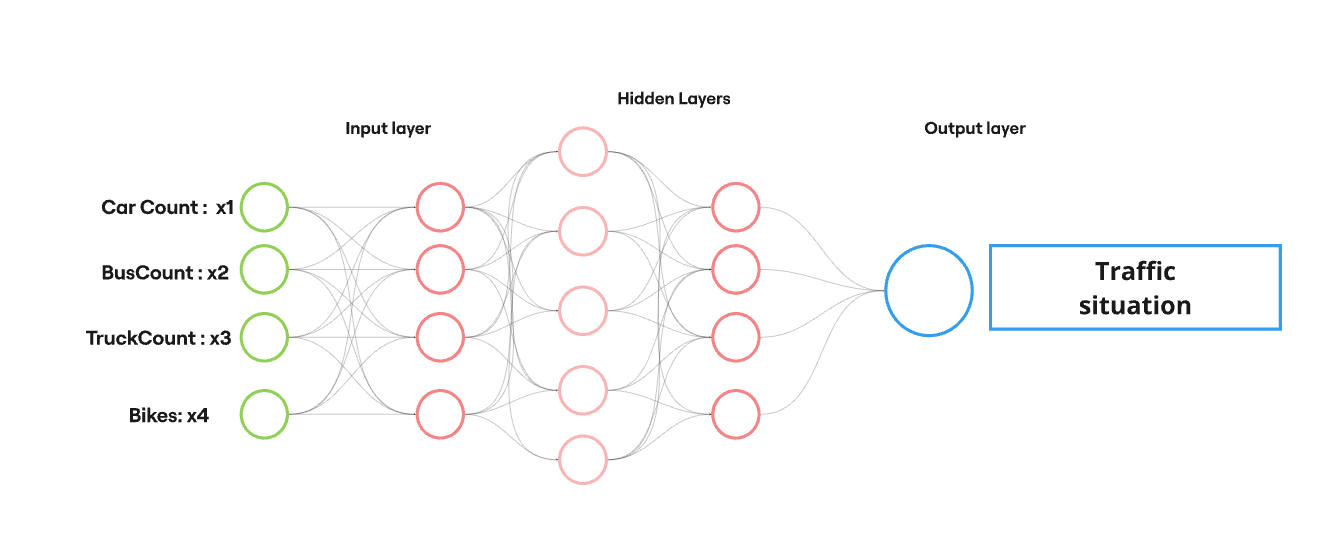

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# Load dataset
file_path = "/content/Traffic.csv"
df = pd.read_csv(file_path)

# Encode categorical target variable
label_encoder = LabelEncoder()
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

# Drop non-numeric and redundant columns
df = df.drop(columns=['Time', 'Date', 'Day of the week'])

# Separate features and target
X = df.drop(columns=['Traffic Situation'])
y = df['Traffic Situation']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_model(y_test, y_pred_classes, title="Confusion Matrix"):
    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()


In [17]:
# Function to plot loss curves
def plot_loss_curves(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

FIRST MODEL

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4923 - loss: 3.2764 - val_accuracy: 0.7517 - val_loss: 1.9477
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 1.7383 - val_accuracy: 0.7685 - val_loss: 1.1524
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7612 - loss: 1.0832 - val_accuracy: 0.7752 - val_loss: 0.8496
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7555 - loss: 0.8595 - val_accuracy: 0.7802 - val_loss: 0.7441
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 0.7438 - val_accuracy: 0.7953 - val_loss: 0.6948
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7718 - loss: 0.7309 - val_accuracy: 0.7987 - val_loss: 0.6697
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7967 - loss: 0.6842 - val_accuracy: 0.8121 - val_loss: 0.6379
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8112 - loss: 0.6519 - val_accuracy: 0.8154 - val_loss: 0.6187
Epo

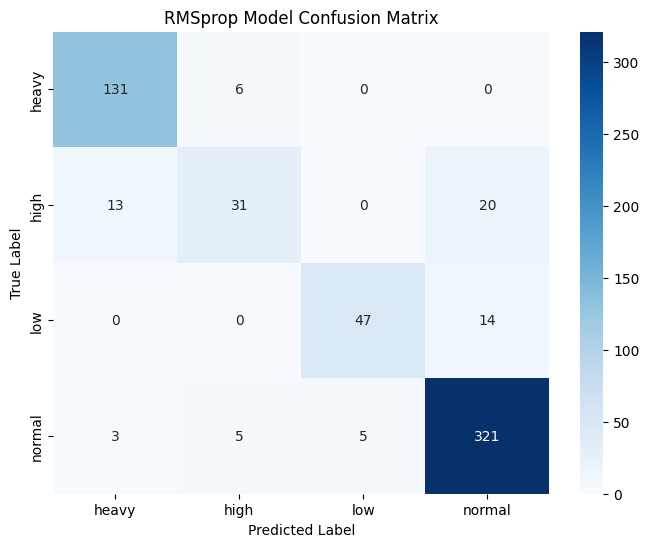

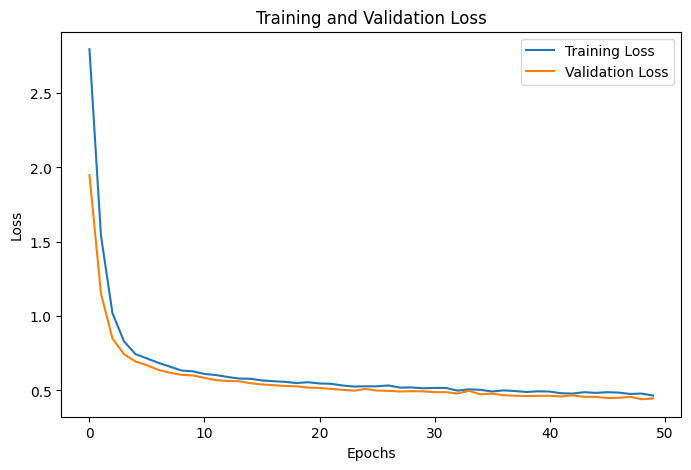

In [18]:
# Neural Network with RMSprop and L2 Regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.05), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.05)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=RMSprop(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="RMSprop Model Confusion Matrix")

# Plot loss curve
plot_loss_curves(history, "Loss Curve - RMSprop Model")

SECOND MODEL

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4186 - loss: 4.0300 - val_accuracy: 0.7332 - val_loss: 2.7804
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7272 - loss: 2.5502 - val_accuracy: 0.7601 - val_loss: 1.7773
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7468 - loss: 1.6685 - val_accuracy: 0.7735 - val_loss: 1.2178
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7567 - loss: 1.2033 - val_accuracy: 0.7752 - val_loss: 0.9915
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7654 - loss: 1.0192 - val_accuracy: 0.7785 - val_loss: 0.8796
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7633 - loss: 0.9248 - val_accuracy: 0.7785 - val_loss: 0.8053
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7698 - loss: 0.8644 - val_accuracy: 0.7836 - val_loss: 0.7561
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7881 - loss: 0.8171 - val_accuracy: 0.7936 - val_loss: 0.7219
Epo

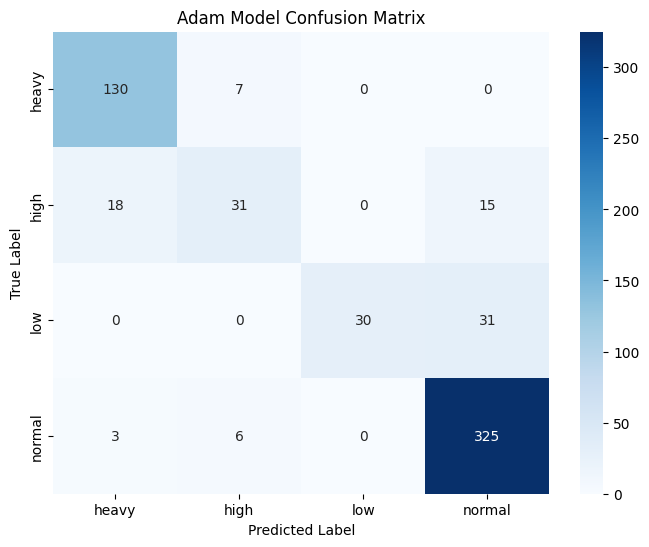

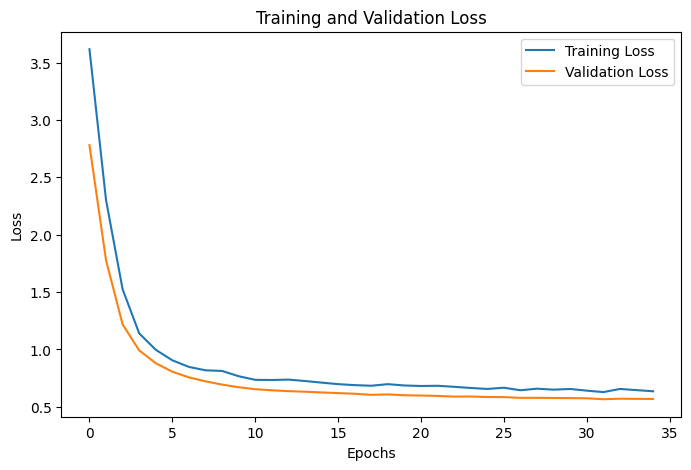

In [19]:
# Neural Network with Adam and L1 Regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l1(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="Adam Model Confusion Matrix")

plot_loss_curves(history, "Loss Curve - Adam Model")


THIRD MODEL

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6585 - loss: 1.3366 - val_accuracy: 0.8473 - val_loss: 0.7655
Epoch 2/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8523 - loss: 0.7254 - val_accuracy: 0.8557 - val_loss: 0.5730
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8648 - loss: 0.5756 - val_accuracy: 0.8540 - val_loss: 0.5129
Epoch 4/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8761 - loss: 0.4934 - val_accuracy: 0.8674 - val_loss: 0.4558
Epoch 5/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8777 - loss: 0.4547 - val_accuracy: 0.8775 - val_loss: 0.4373
Epoch 6/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8880 - loss: 0.4376 - val_accuracy: 0.9027 - val_loss: 0.3815
Epoch 7/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8848 - loss: 0.4065 - val_accuracy: 0.9077 - val_loss: 0.3795
Epoch 8/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9013 - loss: 0.3819 - val_accuracy: 0.8909

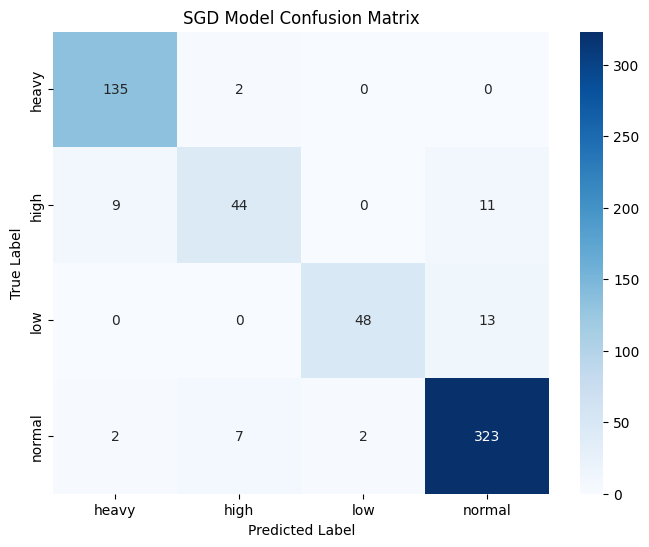

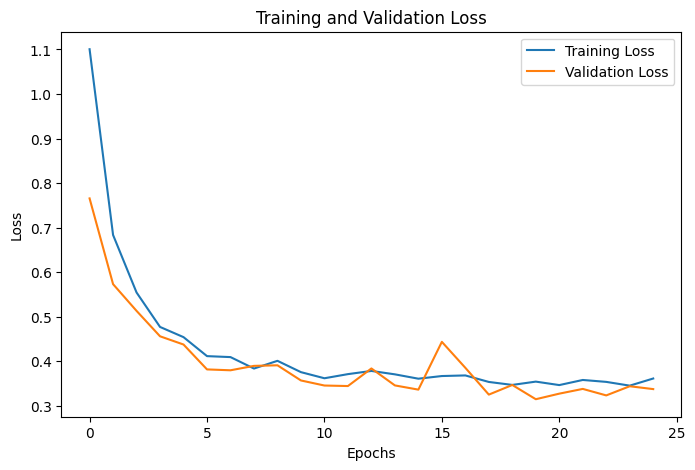

In [21]:
# Neural Network with SGD
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, callbacks=[early_stopping], verbose=1)
y_pred = model.predict(X_test).argmax(axis=1)

evaluate_model(y_test, y_pred, title="SGD Model Confusion Matrix")

plot_loss_curves(history, "Loss Curve - SGD Model")


FOURTH MODEL

Accuracy: 0.8003
Precision: 0.7797
Recall: 0.8003
F1 Score: 0.7614


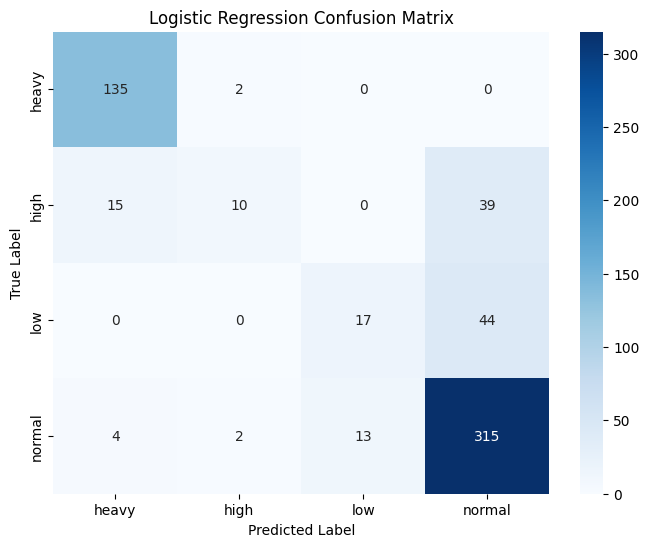

In [7]:
# Logistic Regression with Hyperparameter Tuning
log_reg = LogisticRegression(max_iter=200, solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
evaluate_model(y_test, y_pred, title="Logistic Regression Confusion Matrix")


FIFTH MODEL

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5095 - loss: 1.1031 - val_accuracy: 0.7802 - val_loss: 0.5947
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7989 - loss: 0.5381 - val_accuracy: 0.8876 - val_loss: 0.4101
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9004 - loss: 0.3662 - val_accuracy: 0.9144 - val_loss: 0.3129
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9016 - loss: 0.2871 - val_accuracy: 0.9161 - val_loss: 0.2722
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9252 - loss: 0.2563 - val_accuracy: 0.9144 - val_loss: 0.2494
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9366 - loss: 0.2125 - val_accuracy: 0.9178 - val_loss: 0.2307
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9380 - loss: 0.2049 - val_accuracy: 0.9077 - val_loss: 0.2202
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9443 - loss: 0.2008 - val_accuracy: 0.9111 - val_loss: 0.2089
Epo

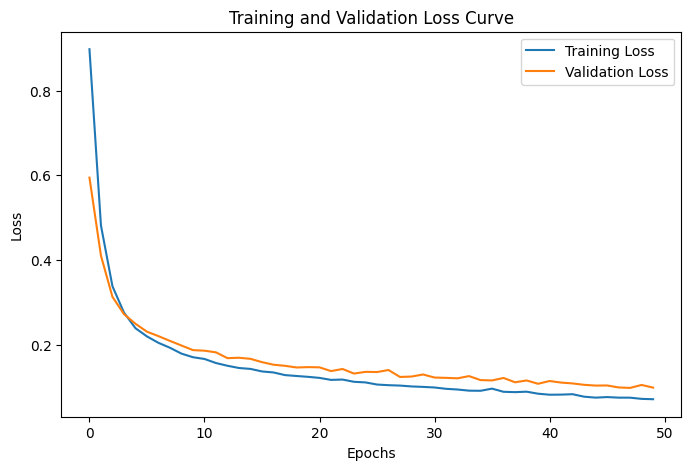

Accuracy: 0.9648
Precision: 0.9648
Recall: 0.9648
F1 Score: 0.9644


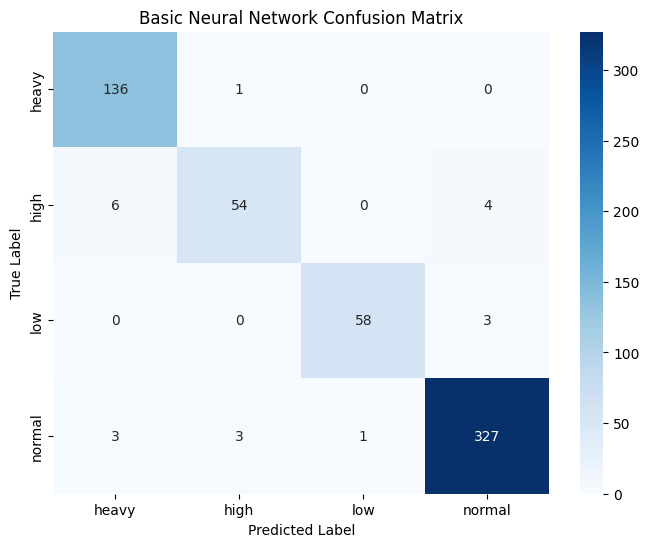

In [8]:
# Basic Neural Network Without Optimization
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Make predictions on test set
y_pred = model.predict(X_test).argmax(axis=1)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.show()

evaluate_model(y_test, y_pred, title="Basic Neural Network Confusion Matrix")


In [9]:
import numpy as np

# Function to make predictions from user input
def predict_traffic():
    print("\nEnter traffic data for prediction:")

    # User input for vehicle counts
    car_count = int(input("Enter number of Cars: "))
    bike_count = int(input("Enter number of Bikes: "))
    bus_count = int(input("Enter number of Buses: "))
    truck_count = int(input("Enter number of Trucks: "))

    # Compute the total vehicle count
    total_count = car_count + bike_count + bus_count + truck_count

    # Create input array
    input_data = np.array([[car_count, bike_count, bus_count, truck_count, total_count]])

    # Standardize input using the same scaler used in training
    input_data_scaled = scaler.transform(input_data)

    # Predict the traffic situation
    predicted_class = model.predict(input_data_scaled).argmax(axis=1)[0]

    # Get the corresponding traffic situation label
    traffic_label = label_encoder.inverse_transform([predicted_class])[0]

    print(f"\n🔹 **Predicted Traffic Situation: {traffic_label}** 🔹")

# Call the function to make predictions
predict_traffic()



Enter traffic data for prediction:
Enter number of Cars: 23
Enter number of Bikes: 12
Enter number of Buses: 3
Enter number of Trucks: 6


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step

🔹 **Predicted Traffic Situation: low** 🔹
